In [29]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load Data

df: pd.DataFrame = pd.read_excel('Coffee Shop Sales.xlsx')

In [31]:
# Display Head Data

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [32]:
# Display Tail Data

df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [33]:
# Display Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [34]:
# Display quick info of numeric data

df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [35]:
# see quick info of categorical data

df.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [36]:
# Check for duplicated rows

df.duplicated().any()

False

In [37]:
# Check for missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [39]:
df['total_price'] = df['transaction_qty'] * df['unit_price']
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_price
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75


In [40]:
stores_income = df[['store_id', 'total_price']].groupby('store_id').sum()
stores_income

,total_price
store_id,
3,232243.91
5,230057.25
8,236511.17


In [41]:
stores_sells = df[['store_id', 'transaction_qty']].groupby('store_id').sum()
stores_sells

,transaction_qty
store_id,
3,70991
5,71742
8,71737


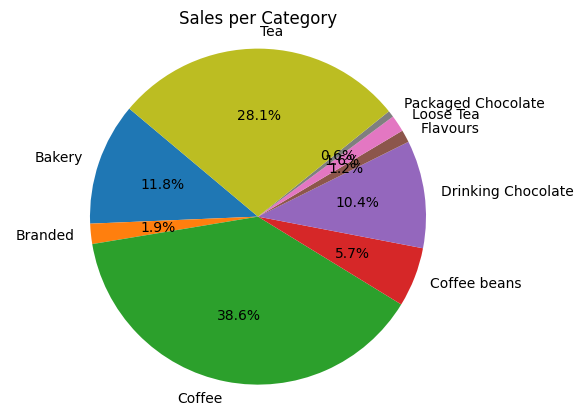

In [125]:
# Pie Chart - Sales per category of product

stores_sells_product_category = df[['product_category', 'total_price']].groupby('product_category').sum()
stores_sells_product_category.plot(kind='pie', y='total_price', autopct='%1.1f%%', startangle=140, legend=False)
plt.axis('equal')
plt.ylabel('')
plt.title('Sales per Category')
plt.show()

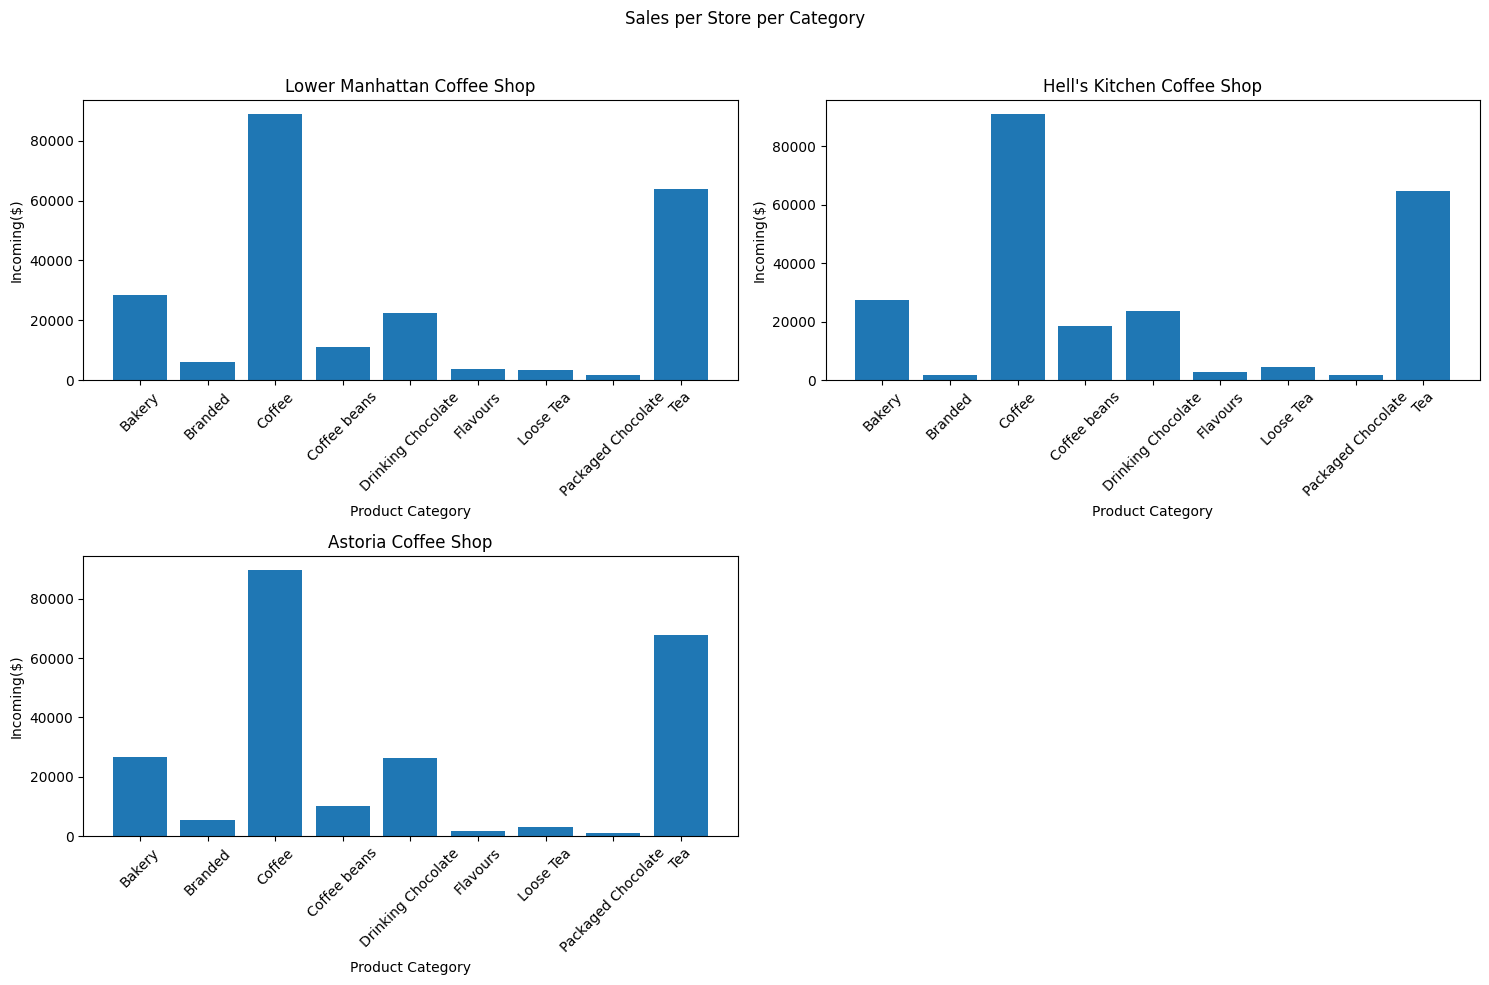

In [244]:
stores_products_sells_type = df[['store_location','product_category', 'total_price']].groupby(['store_location', 'product_category']).sum()

# Histogram - Sales per store per category of product

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sales per Store per Category')
ax = ax.ravel()

for i, store in enumerate(df['store_location'].unique()):
    store_products_sells_type = stores_products_sells_type.loc[store]
    ax[i].bar(store_products_sells_type.index, store_products_sells_type['total_price'])
    ax[i].set_title(f'{store} Coffee Shop')
    ax[i].set_xlabel('Product Category')
    ax[i].set_ylabel('Incoming($)')
    ax[i].tick_params(axis='x', rotation=45)
    
fig.delaxes(ax[-1])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

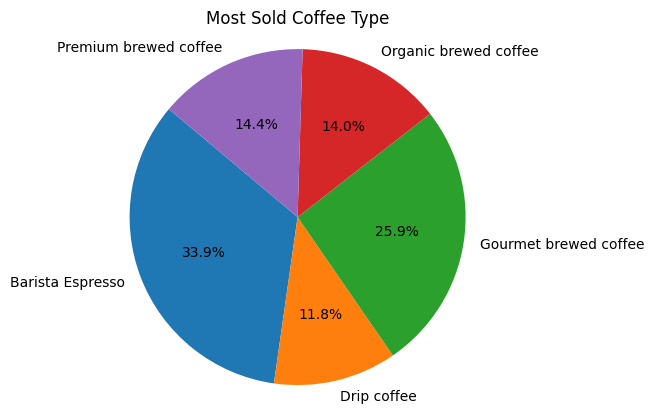

,total_price
product_type,
Barista Espresso,91406.20
Drip coffee,31984.00
Gourmet brewed coffee,70034.60
Organic brewed coffee,37746.50
Premium brewed coffee,38781.15


In [124]:
# Pie Chart - Most sold coffee type

products_sells_type = df[['product_category', 'product_type', 'total_price']].groupby(['product_category', 'product_type']).sum()

coffee_sells_type = products_sells_type.loc['Coffee']
coffee_sells_type.plot(kind='pie', y='total_price', autopct='%1.1f%%', startangle=140, legend=False)
plt.axis('equal')
plt.ylabel('')
plt.title('Most Sold Coffee Type')
plt.show()
coffee_sells_type

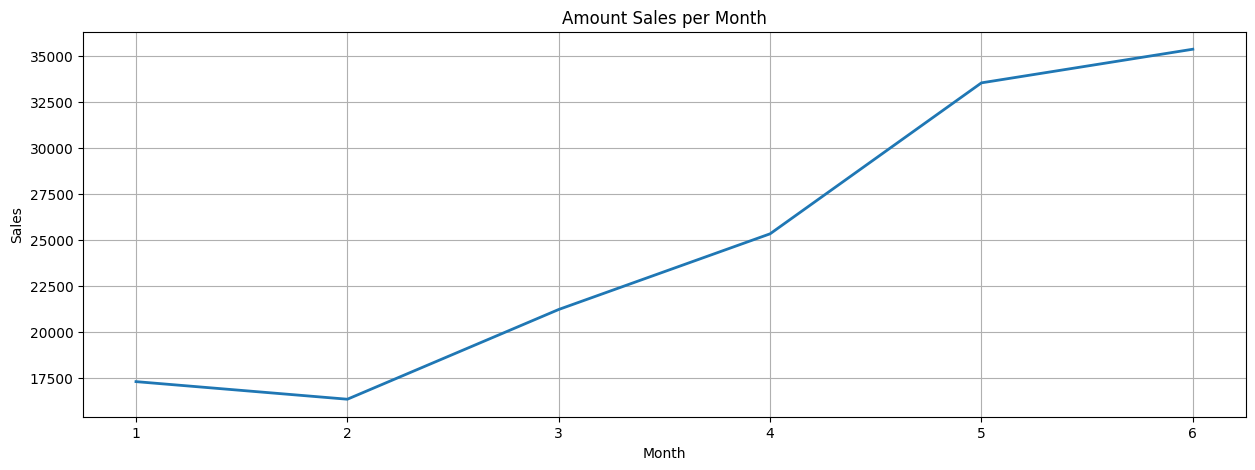

In [242]:
# Histogram - Amount Sales per Month

sales_month: pd.DataFrame = df[['transaction_time', 'month']].groupby(['month']).count()
sales_month.plot(kind='line', figsize=(15, 5), linewidth=2,  colormap='tab20', legend=False, title='Amount Sales per Month', xlabel='Month', ylabel='Sales', grid=True)
plt.show()

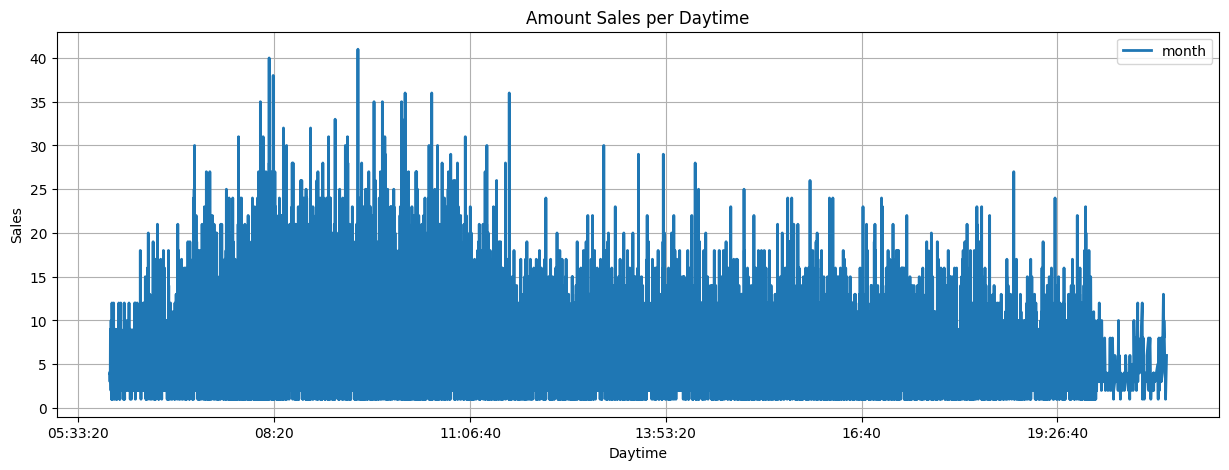

In [231]:
# Histogram - Amount Sales per Daytime

sales_daytime: pd.DataFrame = df[['transaction_time', 'month']].groupby(['transaction_time']).count()
sales_daytime.plot(kind='line', figsize=(15, 5), linewidth=2,  colormap='tab20', legend=True, title='Amount Sales per Daytime', xlabel='Daytime', ylabel='Sales', grid=True)
plt.show()

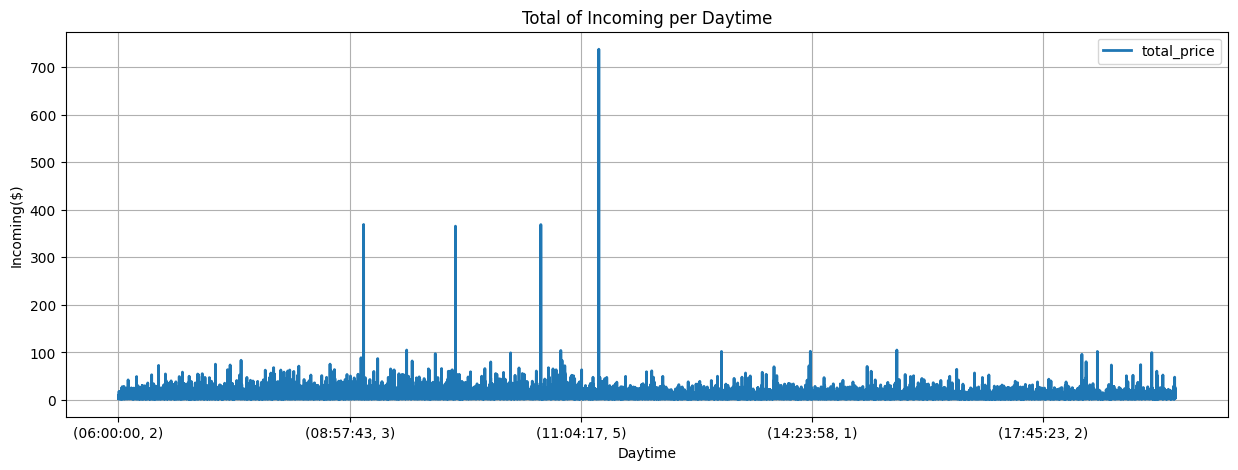

In [235]:
# Histogram - Total of Incoming per Daytime

sales_daytime: pd.DataFrame = df[['transaction_time', 'total_price', 'month']].groupby(['transaction_time', 'month']).sum()
sales_daytime.plot(kind='line', figsize=(15, 5), linewidth=2,  colormap='tab20', legend=True, title='Total of Incoming per Daytime', xlabel='Daytime', ylabel='Incoming($)', grid=True)
plt.show()